In [1]:
import pandas as pd
import scipy.io
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

path = 'C:\\Users\\91726\\Desktop\\Matlab_cancer.mat'

mat = scipy.io.loadmat(path)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Aug 16 12:29:56 2022',
 '__version__': '1.0',
 '__globals__': [],
 't': array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [25]:
labels = mat['t'][0]
data = mat['x'].T
labels = labels.reshape(labels.shape[0],1)



(100, 216)

In [4]:
# Hyper Parameters
output_dim = 1
batch_size = 10
lr = 0.0001
epochs = 20000

In [5]:
# Shuffling the entire dataset
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [6]:
'''
Dividing the data and labels into train and test sets.  
Out of 216, 180 are in train set and 36 are in test set
'''
train_data = data[:180]
test_data = data[180:]
train_labels = labels[:180]
test_labels = labels[180:]

In [7]:
# Initialising weights and bias
def initialize_weights_and_bias(data_size,output_dim):
    W = np.random.randn(data_size, output_dim)*0.0001
    b = 0
    return W,b

In [8]:
# forward propagation
def forward_prop(X,W,B):
    # Inputs to this function are train data(X) and weight matrix(W)
    
    Z = np.dot(X, W) + B # Multiplying data with weight ( Z = W.X + B )
    y_pred = sigmoid(Z) # Applying activation to the Z
    return y_pred,Z

In [9]:
def sigmoid(Z):
    act_Z = 1/(1 + np.exp(-Z))
    return act_Z

In [10]:
def loss_function(Y_pred,Y):
    N = Y.shape[0]
    cost = (1 / N) * np.sum(np.square(np.subtract(Y,Y_pred)))
    return np.squeeze(cost)

In [11]:
def backward_prop(X, Y, Y_pred,Z):
    '''
    Our loss function is MSE. And, we took single layer perceptron. Now, to calculate derivative
    i.e, d(Y_pred)/dW = -2/N*(Y - Y_pred)*(d(Y_pred)/dZ)*(dZ/dW) 

    => d(Y_pred)/dW = -2/N*(Y - Y_pred)*( Y_pred*(1 - Y_pred) )*X
    '''    
    N = Y.shape[0]
    dW = (-2/N)*np.dot(X,(Y-Y_pred)*(Y_pred*(1-Y_pred)))
    return dW

In [12]:
def train(X,Y):
    loss = []
    W,B = initialize_weights_and_bias(X.shape[1],Y.shape[1]) # initialise weights
    for i in range(0,epochs):
        y_pred,Z = forward_prop(X,W,B) # Forward propagation
        J = loss_function(y_pred, Y) # Send the predicted Y values to loss function
        loss.append(J) # Append the loss values in list (later, to plot it)
        if i%1000 ==0:
            # Print the loss value after every 1000 epoch to see how the loss is decreasing
            print("Loss at epoch "+str(i)+" is:",J)
        dW = backward_prop(X.T, Y, y_pred,Z) # Backward propagation
        W = W - lr*dW # Updating weights
    return loss,W

In [13]:
loss_values = train(train_data,train_labels)

Loss at epoch 0 is: 0.24988730436437037
Loss at epoch 1000 is: 0.21601855360986197
Loss at epoch 2000 is: 0.1921546947658153
Loss at epoch 3000 is: 0.17516948404031701
Loss at epoch 4000 is: 0.16268350854546548
Loss at epoch 5000 is: 0.15317450766503216
Loss at epoch 6000 is: 0.14570010011364692
Loss at epoch 7000 is: 0.13966663903800589
Loss at epoch 8000 is: 0.13468785568552827
Loss at epoch 9000 is: 0.13050358200601941
Loss at epoch 10000 is: 0.1269328186340984
Loss at epoch 11000 is: 0.12384594214152975
Loss at epoch 12000 is: 0.12114772477128391
Loss at epoch 13000 is: 0.11876662763189524
Loss at epoch 14000 is: 0.11664784544909768
Loss at epoch 15000 is: 0.1147486631846016
Loss at epoch 16000 is: 0.11303527835934696
Loss at epoch 17000 is: 0.11148057732719577
Loss at epoch 18000 is: 0.11006254750402276
Loss at epoch 19000 is: 0.10876312292451856


In [14]:
# loss_values[0]

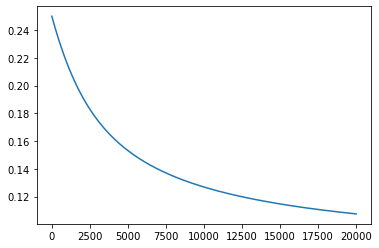

In [15]:
# Plotting the loss values
import matplotlib.pyplot as plt
plt.plot(loss_values[0])
plt.show()

In [16]:
# Checking error and Accuracy on test set
W,B = loss_values[1],0
Acc = 0 # Initialise accuracy with 0
Count = test_data.shape[0] # No of test samples

'''
Now, we fix the network (no more training) and pass the W,B and test data to forward_prop function
to find the predicted test labels
'''
y_pred_test,Z_test = forward_prop(test_data,W,B) #


# for i in range(0,len(test_data)):
#     val = test_data[i]
#     lab = test_labels[i]
y_pred_test.shape

(36, 1)

In [17]:
# Finding the accuracy
for i in range(0,len(y_pred_test)):
    ''' 
    Round the predicted value to nearest integer
    if y_pred_test > 0.5, then, it constitutes to 1 (which means cancer is there)
    else if y_pred_test < 0.5, then, it constitues to 0 (No cancer)
    '''
    if round(y_pred_test[i][0]) == test_labels[i]:
        Acc = Acc + 1

In [18]:
# Accuracy percentage
(Acc/Count)*100

83.33333333333334